# Chapter 1: General Introduction to machine learning (ML)

## ML = "learning models from data"


### About models

A "model" allows us to explain observations and to answer questions. For example:

   1. Where will my car at given velocity stop when I break now ?
   2. Where on the night sky will I see the moon tonight ?
   2. Is the email I received spam ? 
   4. What article X should I recommend to my customers Y ?
   
- The first two questions can be answered based on existing physical models (formulas). 

- For the  questions 3 and 4 it is difficult to develop explicitly formulated models. 

### What is needed to apply ML ?

Problems 3 and 4 have the following in common:

- No exact model known or implementable because we have a vague understanding of the problem domain.
- But enough data with sufficient and implicit information is available.



E.g. for the spamming example:

- We have no explicit formula for such a task
- We have a vague understanding of the problem domeani, because we know that some words are specific for spam emails, other words are specific for my personal and job emails.
- My mailbox is full with examples for spam vs non-spam.


**In such cases machine learning offers approaches to build models based on example data.**




## ML: what is "learning" ?

To create a predictive model, we first must "learn" such a model on given data. 

All ML algorithms have in common that they rely on internal data structures and/or parameters. Learning then builds up such data structures or adjusts parameters based on the given data. After that such models can be used to explain observations or to answer questions.

The important difference between explicit models and models learned from data:

- Explicit models usually offer exact answers to questions
- Models we learn from data usually come with inherent uncertainty.


## Some history

Some parts of ML are older than you might think. This is a rough time line with a few selected achievements from this field:

 
    1812: Bayes Theorem
    1913: Markov Chains
    1951: First neural network
    1959: first use or term "machine learning" AI pioneer Arthur Samuel
    1969: Book "Perceptrons": Limitations of Neural Networks
    1986: Backpropagation to learn neural networks
    1995: Randomized Forests and Support Vector Machines
    1998: Public appearance of ML: naive Bayes Classifier for Spam detection
    2000+: Deep learning
    
So the field is not as new as one might think, but due to 

- more available data
- more processing power 
- development of better algorithms 

more applications of machine learning appeared during the last 15 years.

## Machine learning with Python

Currently (2018) `Python` is the  dominant programming language for ML. Especially the advent of deep-learning pushed this forward. First releases of frameworks such as `TensorFlow` or `PyTorch` were released with`Python` support early.

The prevalent packages in the Python eco-system used for ML include:

- `pandas` for handling tabualar data
- `matplotlib` and `seaborn` for plotting
- `scikit-learn` for classical (non-deep-learning) ML
- `tensorflow`, `PyTorch` and `Keras` for deep-learning.

`scikit-learn` is very comprehensive and the online-documentation itself provides a good introducion into ML.

## ML terms: What are "features" ?

A typical and very common situation is that our data is presented as a table, as in the following example:

In [1]:
import pandas as pd

features = pd.read_csv("beers.csv")
features.head()

alcohol_content  bitterness  darkness  fruitiness  is_yummy
0         3.739295    0.422503  0.989463    0.215791         0
1         4.207849    0.841668  0.928626    0.380420         0
2         4.709494    0.322037  5.374682    0.145231         1
3         4.684743    0.434315  4.072805    0.191321         1
4         4.148710    0.570586  1.461568    0.260218         0


**Definitions**:
- every row of such a matrix is called a **sample** or **feature vector**. 

- the cells in a row are **feature values**.
- every column name is called a **feature name** or **attribute**.

This table shown holds five samples.

The feature names are `alcohol_content`, `bitterness`, `darkness`, `fruitiness` and `is_yummy`.

(Almost) all machine learning algorithms require that your data is numerical and/or categorial. In some applications it is not obvious how to transform data to a numerical presentation.

**Definition**:

*Categorical data*: data which has only a limited set of allowed values. A `taste` feature could only allow values `sour`, `bitter`, `sweet`, `salty`.

A straight-forward application for machine-learning on the previos beer dataset is: **"can we predict `is_yummy` from the other features"** ?

In this case we would call the features `alcohol_content`, `bitterness`, `darkness`, `fruitiness` our **input features** and `is_yummy` our **target value**.

### How to represent images as  feature vectors ?

To simplify our explanations we consider gray images only here. Computers represent images as matrices. Every cell in the matrix represents one pixel, and the numerical value in the matrix cell its gray value.

As we said, most machine learning algorithms require that every sample is represented as a  vector containing numbers. 

So how can we represent images as vectors then ?

`scikit-learn`  includes some example data sets which we load now:

In [8]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
dd = load_digits()

Next we plot the first nine digits from this data set:

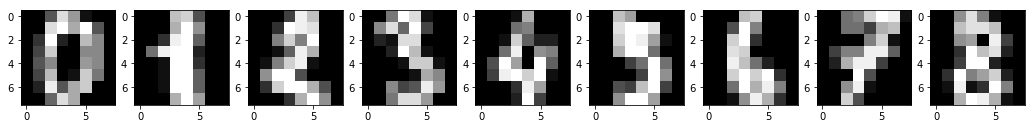

In [76]:
N = 9

plt.figure(figsize=(2 * N, 5))

for i, image in enumerate(dd.images[:N]):
    plt.subplot(1, N, i + 1)
    plt.imshow(image, cmap="gray")

And this is the first image from the data set, it is a 8 x 8 matrix with values 0 to 15. The range 0 to 15 is fixed for this specific data set. Other formats allow e.g. values 0..255 or floating point values in the range 0 to 1.

In [11]:
print(dd.images[0].shape)
print(dd.images[0])

(8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


To transform such an image to a feature vector we just have to concatenate the rows to one single vector of size 64:

In [12]:
vector = dd.images[0].flatten()
print(vector.shape)
print(vector)

(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


### How to present textual data as feature vectors ?

If we start a machine learning project for texts, we first have to choose and fix an enumerated dictionary or words for this project. The final representation of texts as feature vectors depends on this dictionary. 

Such a dictionary can be very large, but for the sake of simplicity we use a very small enumerated dictionary to explain the overall procedure:


| Word     | Index |
|----------|-------|
| like     | 0     |
| dislike  | 1     |
| american | 2     |
| italian  | 3     |
| beer     | 4     |
| pizza    | 5     |

To "vectorize" a given text we count the words in the text which also exist in the vocabulary and put the counts at the given position `Index`.

E.g. `"I dislike american pizza, but american beer is nice"`:

| Word     | Index | Count |
|----------|-------|-------|
| like     | 0     | 0     |
| dislike  | 1     | 1     |
| american | 2     | 2     |
| italian  | 3     | 0     |
| beer     | 4     | 1     |
| pizza    | 5     | 1     |

The according feature vector is the `Count` column, which is:

`[0, 1, 2, 0, 1, 1]`

In real case scenarios the dictionary is much bigger, this results then in vectors with only few non-zero entries (so called sparse vectors).

And this is how we can compute such a word vector using Python:

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import count

vocabulary = {"like": 0, "dislike": 1, "american": 2, "italian": 3, "beer": 4, "pizza": 5}

vectorizer = CountVectorizer(vocabulary=vocabulary)

# create count vector for a pice of text:
vector = vectorizer.fit_transform(["I dislike american pizza. But american beer is nice"]).toarray().flatten()
print(vector)

[0 1 2 0 1 1]


## Taxonomy of machine learning

Most applications of ML belong to two categories: **supervised** and **unsupervised** learning.

### Supervised learning 

In supervised learning the the data comes with an additional target value that we want to predict. Such a problem can be either 

- **classification**: we want to predict a categorical value.
    
- **regression**: we want to predict numbers in a given range.
    
  

Examples for supervised learning:

- Classification: Predict the class `is_yummy`  based on the attributes `alcohol_content`,	`bitterness`, 	`darkness` and `fruitiness`. (two class problem).

- Classification: predict the digit-shown based on a 8 x 8 pixel image (this is a multi-class problem).

- Regression: Predict the length of a salmon based on its age and weight.

### Unsupervised learning 

In unsupervised learning, in which the training data consists of samples without any corresponding target values, one tries to find structure in data. Some common applications are

- Clustering: find groups in data.
- Density estimation, novelty detection: find a probability distribution in your data.
- Dimension reduction (e.g. PCA): find latent structures in your data.

Examples for unsupervised learning:

- Can we split up our beer data set into sub groups of similar beers ?
- Can we reduce our data set because groups of features are somehow correlated ?

<table>
    <tr>
    <td><img src="./cluster-image.png/" width=60%></td>
    <td><img src="./nonlin-pca.png/" width=60%></td>
    </tr>
    <tr>
        <td><center>Clustering</center></td>
        <td><center>Dimension reduction: detecting 2D structure in 3D data</center></td>
    </tr>
</table>



This course will only introduce concepts and methods from **supervised learning**.

## How to apply machine learning in practice ?

Application of machine learning in practice consists of several phases:

1. Understand and clean your data.
1. Learn / train a model 
2. Analyze model for its quality / performance
2. Apply this model to new incoming data

In practice steps 1. and 2. are iterated for different machine learning algorithms with different configurations until performance is optimal or sufficient. 

# Exercise section 1

Our example beer data set reflects the very personal opinion of one of the tutors which beer he likes and which not. To learn a predictive model and to understand influential factors all beers went through some lab analysis to measure alcohol content, bitterness, darkness and fruitiness.

In [126]:
import pandas as pd

# read some data
beer_data = pd.read_csv("beers.csv")
beer_data.head(5)

alcohol_content  bitterness  darkness  fruitiness  is_yummy
0         3.739295    0.422503  0.989463    0.215791         0
1         4.207849    0.841668  0.928626    0.380420         0
2         4.709494    0.322037  5.374682    0.145231         1
3         4.684743    0.434315  4.072805    0.191321         1
4         4.148710    0.570586  1.461568    0.260218         0

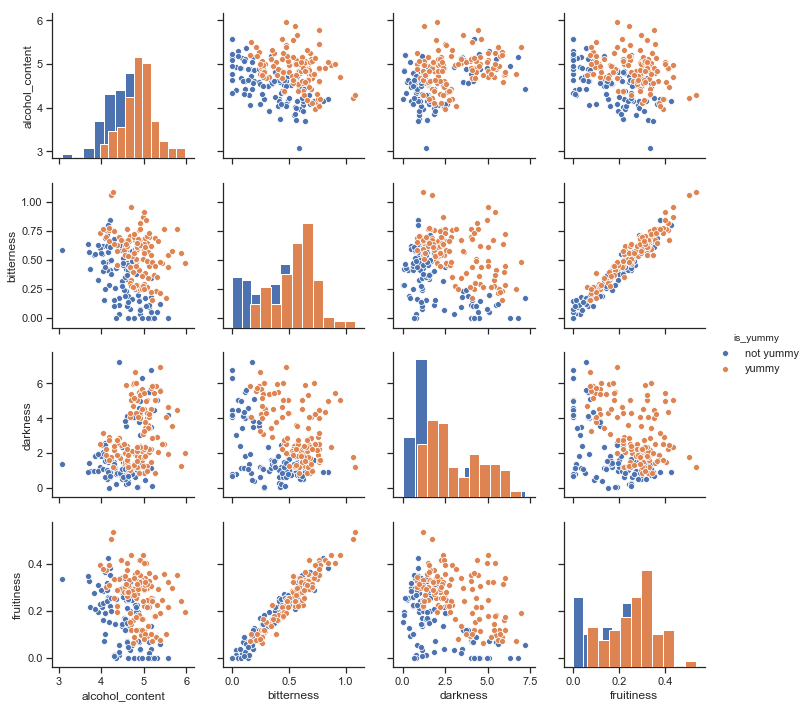

In [159]:
import seaborn as sns
sns.set(style="ticks")

for_plot = beer_data.copy()

def translate_label(value):
    return "yummy" if value == 1 else "not yummy"

for_plot["is_yummy"] = for_plot["is_yummy"].apply(translate_label)

sns.pairplot(for_plot, hue="is_yummy", diag_kind="hist");

Now we split our data frame into the input features and target values:

In [157]:
# all columns up to the last one:
input_features = beer_data.iloc[:, :-1]

# only the last column:
labels = beer_data.iloc[:, -1]

print(input_features.head(5))
print()
print(labels.head(5))

   alcohol_content  bitterness  darkness  fruitiness
0         3.739295    0.422503  0.989463    0.215791
1         4.207849    0.841668  0.928626    0.380420
2         4.709494    0.322037  5.374682    0.145231
3         4.684743    0.434315  4.072805    0.191321
4         4.148710    0.570586  1.461568    0.260218

0    0
1    0
2    1
3    1
4    0
Name: is_yummy, dtype: int64


We experiment now the so called `LogisticRegression` classifier. The name is misleading: logistic regression internally uses a kind of regression algorithm for probabilities with the final goal to classify data. So even if the name contains "regression" it still is a classifier.

In [81]:
from sklearn.linear_model import LogisticRegression

In [144]:
classifier = LogisticRegression(C=1)

In `scikit-learn` all classifiers have a `fit` method to learn from data:

In [145]:
classifier.fit(input_features, labels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Also `scikit-learn` classifiers have a `predict` method for predicting classes for input features. Here we just re-classify our learning data:

In [47]:
predicted_labels = classifier.predict(input_features)

Lets check our result with a few examples:

In [48]:
for i in range(5):
    print(labels[i], predicted_labels[i])

0 0
0 1
1 1
1 1
0 0


This looks suspicious !

Lets investigate this further:

In [140]:
print(len(labels), "examples")
print(sum(predicted_labels == labels), "labeled correctly")

225 examples
191 labeled correctly


Comment: `predicted_labels == labels` evaluates as a vector of values `True` or `False`. Python handles `True` as `1` and `False` as `0` when used as numbers. So the `sum(...)` just counts the correct results.


## What happened ?

Why were not not all labels where predicted correctly ?

Neither `Python` nor `scikit-learn` is broken. What we observed above is very typical for machine-learning applications.

The reason here is that we have incomplete information: other features of beer which also contribute to the rating (like "maltiness") where not measured or can not be measured. So even the best algorithm can not predict the target values reliably.

Another reason might be mistakes in the input data, e.g. some labels are assigned incorrectly.

* Finding good features is crucial for the performance of ML algorithms !


* Another important issue is make sure that you have clean data: input-features might be corrupted by flawed entries, feeding such data into a ML algorithm will usually lead to reduced performance.

Now we play with a different ML algorithm, the so called `Support Vector Classifier` (which belongs to a class of algorithms named `SVM`s (`Support Vector Machines`).

**we will discuss available ML algorithms in a following script**


In [154]:
from sklearn.svm import SVC

classifier = SVC(C=1)
classifier.fit(features, labels)

predicted_labels = classifier.predict(features)

Lets evaluate the performance again:

In [155]:
print(predicted_labels.shape)
print(labels.shape)
print(sum(predicted_labels == labels))

(225,)
(225,)
205


This is a better result ! **But this does not indicate that `SVC` is always superior to `LogisticRegression`.**

Here `SVC` just seems to fit better to our current machine learning task.

### Instructions:

- Play with parameter `C` for `LogisticRegresseion` and `SVC`.


In [75]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR STYLING THE CONTENT ABOVE !

from IPython import utils
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    base = utils.path.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
       
        -webkit-print-color-adjust: exact important !;
        
      
       
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
        background: #f5f5f5; 
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    p {
      line-height: 140%;
    }
    
    strong code {
        background: red;
    }
    
    .rendered_html strong code
    {
        background: #f5f5f5;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #f5f5f5;
         margin-top: 4pt;
         margin-bottom: 4pt;
         padding: 2pt;
         border: 0.5px solid #a0a0a0;
         font-weight: bold;
         color: darkred;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-height: 145%;
    }

    div.output_area pre {
        background: #fff9d8 !important;
        padding: 5pt;
       
       -webkit-print-color-adjust: exact; 
        
    }
 
    
 
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND

/Users/uweschmitt/Projects/machinelearning-introduction-workshop/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: get_ipython_dir has moved to the IPython.paths module since IPython 4.0.
  if __name__ == '__main__':
